In [29]:
import os
import vtuIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from IPython.display import display, Image

In [30]:
#settings
path='./'
fig_dir = "./figures/"

## Introduction

The background of this benchmark is the production of hydrogen gas due to the corrosion of the metallic container in the nuclear waste repository. Numerical model is built to illustrate such gas appearance phenomenon. The model domain is a two dimensional horizontal column representing the bentonite backfill in the repository tunnel, with hydrogen gas injected on the left boundary. This benchmark was proposed in the GNR MoMaS project by French National Radioactive Waste Management Agency. Several research groups has made contributions to test the benchmark and provided their reference solutions Neumann et al. (2013); Bourgeat et al. (2009); Marchand and Knabner (2014); Ben Gharbia and Jaffré (2014). Here we adopted the results proposed in Marchand’s paper Marchand and Knabner (2014) for comparison.

## Physical Scenario

Here a 2D rectangular domain $Ω$ = [0, 200] × [−10, 10] m (see Figure 1) was considered with an impervious boundary at $Γ_\mathrm{imp}$ = [0, 200] × [−10, 10] m, an inflow boundary at $Γ_\mathrm{in}$ = 0 × [−10, 10] m and an outflow boundary at $Γ_\mathrm{out}$ = 200 × [−10, 10] m. The domain was initially saturated with water, hydrogen gas was injected on the left-hand-side boundary within a certain time span ([0, 5 × 10<sup>4</sup> centuries]). After that the hydrogen injection stopped and no flux came into the system. The right-hand-side boundary is kept open throughout the simulation. The initial condition and boundary conditions were summarized as

-    $X$($t$ = 0) = 10$^5$     and     $p_\mathrm{L}$($t$ = 0) = $p_\mathrm{L}^\mathrm{out}$ = 10$^6$ Pa   on $Ω$ 
-    $q^\mathrm{w}$$\cdot$$v$ = $q^\mathrm{h}$$\cdot$$v$ = 0   on $\Gamma_\mathrm{imp}$
-    $q^\mathrm{w}$$\cdot$$v$ = 0, $q^\mathrm{h}$$\cdot$$v$ = $Q_\mathrm{d}^\mathrm{h}$ = 0.2785 [mol century$^{-1}$ m$^{-2}$]  on $\Gamma_\mathrm{in}$
-    $X$ = 0 and $p_\mathrm{L}$ = $p_\mathrm{L}^\mathrm{out}$ = 10$^6$ Pa on $\Gamma_\mathrm{out}$

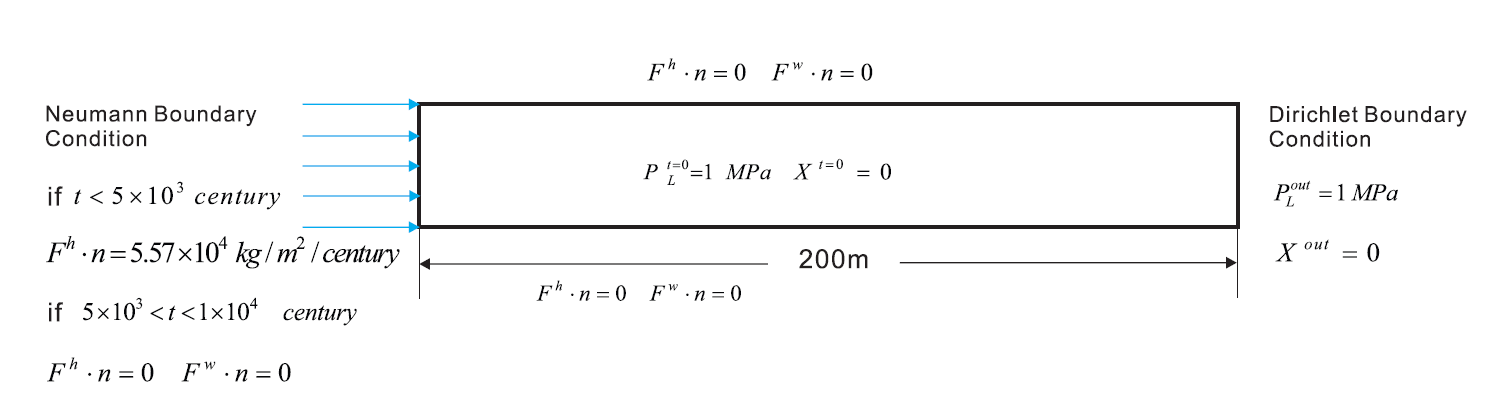

In [25]:
Image(filename = fig_dir + "Geo_BC_H2_inj_bench.png", width=800, height=800)

Figure 1: Geometry and boundary condition for the H<sub>2</sub> injection benchmark.

## Model parameters and numerical settings

The capillary pressure $p_\mathrm{c}$ and relative permeability functions are given by the van-Genuchten model (Van Genuchten 1980).
\begin{equation}
    p_\mathrm{c}=p_\mathrm{d}\left((S_\mathrm{L}^\mathrm{eff})^{\frac{-1}{m}}-1\right)^{\frac{1}{n}}
\end{equation}

\begin{equation}
    k_\mathrm{L}^\mathrm{rel}=\sqrt{S_\mathrm{L}^\mathrm{eff}}\left(1-\left(1-(S_\mathrm{L}^\mathrm{eff})^{\frac{1}{m}}\right)^{m}\right)^{2}
\end{equation}

\begin{equation}
    k_\mathrm{G}^\mathrm{rel}=\sqrt{1-S_\mathrm{L}^\mathrm{eff}}\left(1-(S_\mathrm{L}^\mathrm{eff})^{\frac{1}{m}}\right)^{2m}
\end{equation}
where $m$ = 1 - 1/$n$ , $p_r$ and $n$ are the van-Genuchten model parameters and the effective saturation $S_\mathrm{L}^\mathrm{eff}$ is given by
\begin{equation}
        S_\mathrm{L}^\mathrm{eff}=\frac{1-S_\mathrm{G}-S_\mathrm{L}^\mathrm{rel}}{1-S_\mathrm{L}^\mathrm{rel}-S_\mathrm{G}^\mathrm{rel}}
\end{equation}
here $S_\mathrm{L}^\mathrm{rel}$ and $S_\mathrm{G}^\mathrm{rel}$ indicate the residual saturation in liquid and gas phases, respectively. Values of parameters applied in this model are summarized in Table 1.

Table 1: Fluid and porous medium properties applied in the H$_2$ migration benchmark.

| Parameter | Symbol | Value | Unit |
| :-: | :-: | :-: | :-: |
| Intrinsic permeability                        |  $k$                         | 5 $\cdot$ 10<sup>-20</sup>| m$^2$ |
| Porosity                                      |  $\phi$                      | 0.15            |   -   |
| Residual Saturation of liquid phase           |  $S_\mathrm{L}^\mathrm{rel}$ | 0.4             |   -   |
| Residual Saturation of gas phase              |  $S_\mathrm{G}^\mathrm{rel}$ | 0               |   -   |
| Viscosity of liquid                           |  $\mu_\mathrm{L}$            | 1 $\cdot$ 10<sup>-3</sup>| Pa $\cdot$ s  |
| Viscosity of gas                              |  $\mu_\mathrm{G}$            | 9 $\cdot$ 10<sup>-6</sup>| Pa $\cdot$ s  |
| van Genuchten paramteter                      |  $p_d$                       | 2 $\cdot$ 10<sup>6</sup> | Pa |
| van Genuchten paramteter                      |  $n$                         | 1.49            |   -   |


# Results and analysis 

The results of this benchmark are depicted in Figure 2. The evolution of gas phase saturation and the gas/liquid phase pressure over the entire time span are shown. In additional, we compare results from our model against those given in Marchand’s
paper (Marchand and Knabner, 2014). In Figure 2, solid lines are our simulation results while the symbols are the results fromMarchand et al. It can be seen that a good agreement has been achieved.


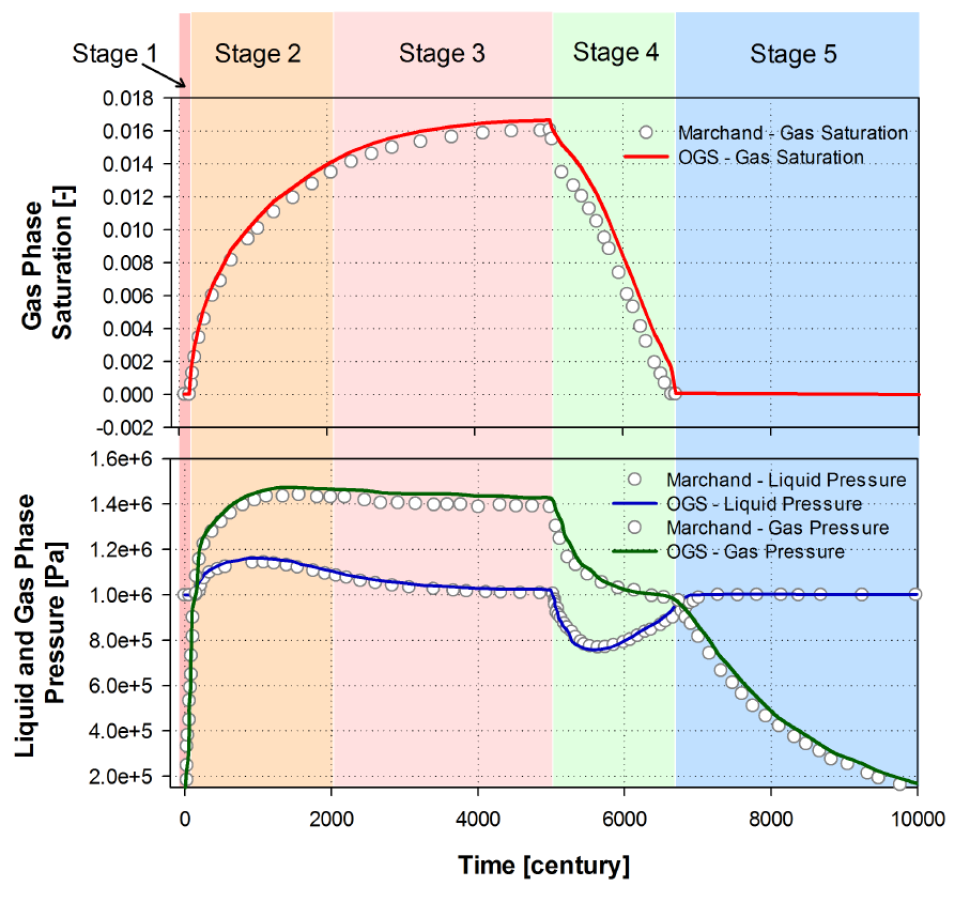

In [26]:
Image(filename = fig_dir + "Res_H2_inj_bench.png", width=600, height=600)

Figure 2: Evolution of pressure and saturation over time.

## References

Ben Gharbia, I., Jaffré, J., 2014. Gas phase appearance and disappearance as a problem with complementarity constraints. Mathematics and Computers in Simulation 99, 28–36.

Bourgeat, A., Jurak, M., Smaï, F., 2009. Two-phase, partially miscible flowand transport modeling in porous media; application to gas migration in a nuclear waste repository. Computational Geosciences 13 (1), 29–42.

Marchand, E., Knabner, P., 2014. Results of the momas benchmark for gas phase appearance and disappearance using generalized mhfe. Advances in Water Resources 73, 74–96.

Neumann, R., Bastian, P., Ippisch, O., 2013. Modeling and simulation of two-phase two-component flow with disappearing nonwetting phase.ComputationalGeosciences 17 (1), 139–149.

Van Genuchten, M. T., 1980. A closed-form equation for predicting the hydraulic conductivity of unsaturated soils. Soil science society of America journal 44 (5), 892–898.